In [1]:
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

  Using cached segmentation_models_pytorch-0.3.3-py3-none-any.whl (106 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.6 kB/s eta 0:00:00m eta 0:00:010:00:02
  Using cached pretrainedmodels-0.7.4.tar.gz (58 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.6 kB/s eta 0:00:00m eta 0:00:010:01:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 101.9 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=9293ad79e96abfba5f0e9a5572ed24be3d780a2f8d96e115c9a617af7a58e645
  Stored in directory: /home/amin/.cache/pip/wheels/29/16/24/752e89d88d333af39a288421e64d613b5f652918e39ef1f8e3
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=9d5cc8d7b1735270d60385f5bf40a54a5aa215db5cc40154c1be3c40bd8600a3
  Stored in directory: /home/am

  Created wheel for albumentations: filename=albumentations-1.3.0-py3-none-any.whl size=125704 sha256=4f3f040b387d2e2c221d798e050db8a08ad770bddfc12465e187d0746bb20fd1
  Stored in directory: /tmp/pip-ephem-wheel-cache-r3bbe7jt/wheels/6d/72/93/d30af2a1f90e7c7e811e8fa43aa723971c91af45052ffa1b5a
Successfully built albumentations
     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/67.9 MB 13.5 kB/s eta 1:16:32^C
     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/67.9 MB 13.5 kB/s eta 1:16:32
ERROR: Operation cancelled by user


In [3]:
import sys
sys.path.append('/media/amin/01D8E46A7A48FE60/projects/Instance-Segmentation-on-ADE20K-dataset')

In [4]:
import torch 
import cv2

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from tqdm import tqdm

import helper

In [74]:
TXT_FILE = '/media/amin/01D8E46A7A48FE60/projects/Instance-Segmentation-on-ADE20K-dataset/dataset/images/training.txt'
DATA_DIR = '/media/amin/01D8E46A7A48FE60/projects/'
IMAGES_PATH = '/media/amin/01D8E46A7A48FE60/projects/Instance-Segmentation-on-ADE20K-dataset/dataset/images/'
ANNOTITIONS_PATH = '/media/amin/01D8E46A7A48FE60/projects/Instance-Segmentation-on-ADE20K-dataset/dataset/annotations_instance/'

DEVICE = 'cuda'
EPOCHS = 25
LR = 0.003
IMAGE_SIZE = 320
BATCH_SIZE = 16

ENCODER = 'timm-efficientnet-b0'
WEIGHTS = 'imagenet'

In [59]:
df = pd.read_fwf(TXT_FILE,header=None)
df.columns = ['images']
df.head()

,images
0,training/ADE_train_00000001.jpg
1,training/ADE_train_00000002.jpg
2,training/ADE_train_00000003.jpg
3,training/ADE_train_00000004.jpg
4,training/ADE_train_00000005.jpg


In [68]:
masks = []
for i in range(len(df)):
    masks.append(df.iloc[i][0].replace('jpg' , 'png'))
masks

['training/ADE_train_00000001.png',
 'training/ADE_train_00000002.png',
 'training/ADE_train_00000003.png',
 'training/ADE_train_00000004.png',
 'training/ADE_train_00000005.png',
 'training/ADE_train_00000006.png',
 'training/ADE_train_00000007.png',
 'training/ADE_train_00000008.png',
 'training/ADE_train_00000009.png',
 'training/ADE_train_00000010.png',
 'training/ADE_train_00000011.png',
 'training/ADE_train_00000012.png',
 'training/ADE_train_00000013.png',
 'training/ADE_train_00000014.png',
 'training/ADE_train_00000015.png',
 'training/ADE_train_00000016.png',
 'training/ADE_train_00000017.png',
 'training/ADE_train_00000018.png',
 'training/ADE_train_00000019.png',
 'training/ADE_train_00000020.png',
 'training/ADE_train_00000021.png',
 'training/ADE_train_00000022.png',
 'training/ADE_train_00000023.png',
 'training/ADE_train_00000024.png',
 'training/ADE_train_00000025.png',
 'training/ADE_train_00000026.png',
 'training/ADE_train_00000027.png',
 'training/ADE_train_0000002

In [69]:
df['masks'] = masks
df

,images,masks
0,training/ADE_train_00000001.jpg,training/ADE_train_00000001.png
1,training/ADE_train_00000002.jpg,training/ADE_train_00000002.png
2,training/ADE_train_00000003.jpg,training/ADE_train_00000003.png
3,training/ADE_train_00000004.jpg,training/ADE_train_00000004.png
4,training/ADE_train_00000005.jpg,training/ADE_train_00000005.png
...,...,...
20205,training/ADE_train_00020206.jpg,training/ADE_train_00020206.png
20206,training/ADE_train_00020207.jpg,training/ADE_train_00020207.png
20207,training/ADE_train_00020208.jpg,training/ADE_train_00020208.png
20208,training/ADE_train_00020209.jpg,training/ADE_train_00020209.png


In [78]:
row = df.iloc[600]

image_path = IMAGES_PATH + row.images
mask_path = ANNOTITIONS_PATH + row.masks

image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE) / 255.0

In [79]:
print(image.shape)
print(mask.shape)

(512, 768, 3)
(512, 768)


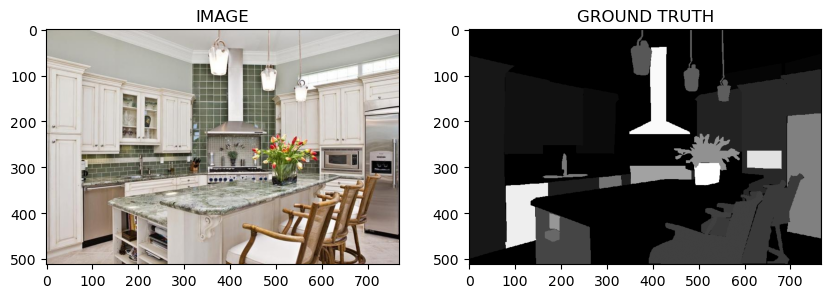

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
ax1.set_title('IMAGE')
ax1.imshow(image)

ax2.set_title('GROUND TRUTH')
ax2.imshow(mask,cmap = 'gray')